✓ Chart saved as 'Slide9_Rent_Distribution_Final.png'


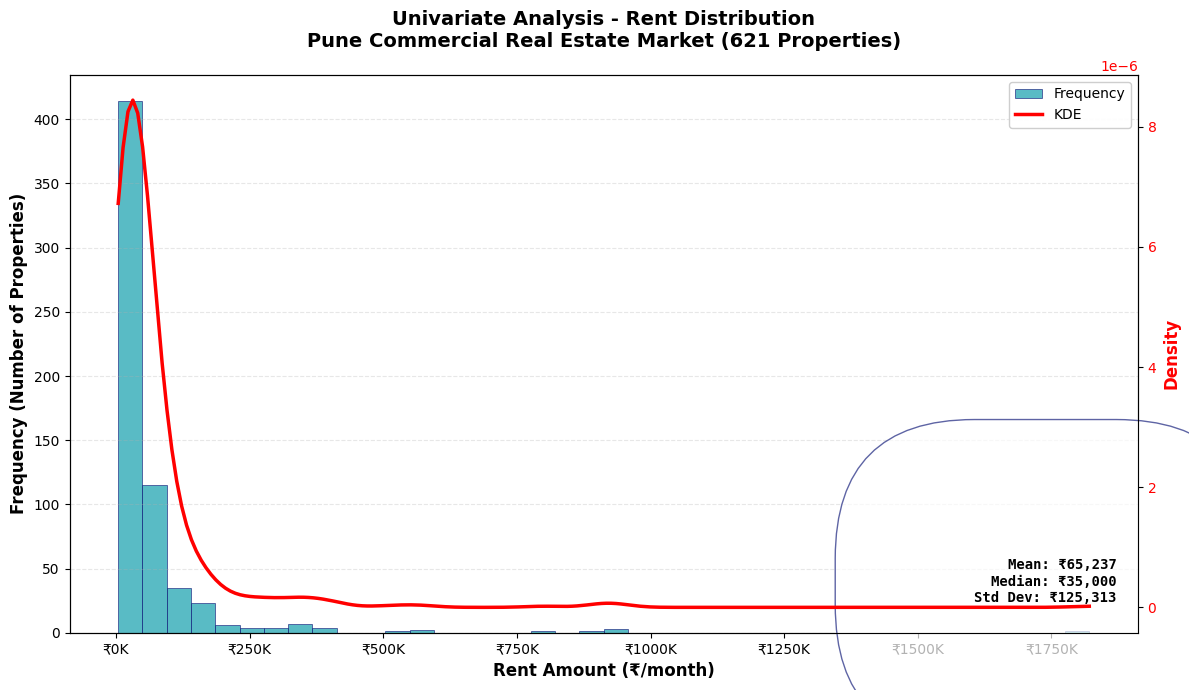

In [2]:
"""
SLIDE 9: UNIVARIATE ANALYSIS - RENT DISTRIBUTION
OPTION 3: Transparent Statistics Box at Bottom-Right
(Professional, Clean, Information Visible)
"""

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, ax = plt.subplots(figsize=(12, 7))

# Create histogram
n, bins, patches = ax.hist(df['rent_amount'], 
                            bins=40, 
                            color='#0097A7', 
                            alpha=0.65,
                            edgecolor='#1A237E',
                            linewidth=0.7,
                            label='Frequency')

# Create secondary y-axis for KDE
ax2 = ax.twinx()

# Calculate and plot KDE
kde = stats.gaussian_kde(df['rent_amount'])
x_range = np.linspace(df['rent_amount'].min(), df['rent_amount'].max(), 200)
ax2.plot(x_range, kde(x_range), 'r-', linewidth=2.5, label='KDE')

# Primary axis (left) - Frequency
ax.set_xlabel('Rent Amount (₹/month)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency (Number of Properties)', fontsize=12, fontweight='bold', color='black')
ax.tick_params(axis='y', labelcolor='black')

# Secondary axis (right) - Density
ax2.set_ylabel('Density', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title
ax.set_title('Univariate Analysis - Rent Distribution\nPune Commercial Real Estate Market (621 Properties)', 
             fontsize=14, fontweight='bold', pad=20)

# Format x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Grid
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Statistics box - OPTION 3: Transparent, Bottom-Right
mean_rent = df['rent_amount'].mean()
median_rent = df['rent_amount'].median()
std_rent = df['rent_amount'].std()

stats_text = f"""Mean: ₹{mean_rent:,.0f}
Median: ₹{median_rent:,.0f}
Std Dev: ₹{std_rent:,.0f}"""

# Position: (0.98, 0.05) = Bottom-Right
# Box: White background, alpha=0.7 (transparent)
ax.text(0.98, 0.05, stats_text, 
        transform=ax.transAxes, 
        fontsize=10,
        verticalalignment='bottom',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', 
                  facecolor='white',      # White background
                  alpha=0.7,              # Transparent (70% opaque)
                  pad=10,
                  edgecolor='#1A237E',    # Navy border
                  linewidth=1),
        family='monospace',
        fontweight='bold')

# Combine legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper right', fontsize=10, framealpha=0.95)

plt.tight_layout()
plt.savefig('Slide9_Rent_Distribution_Final.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide9_Rent_Distribution_Final.png'")

plt.show()


✓ Chart saved as 'Slide10_Localities_Improved.png'


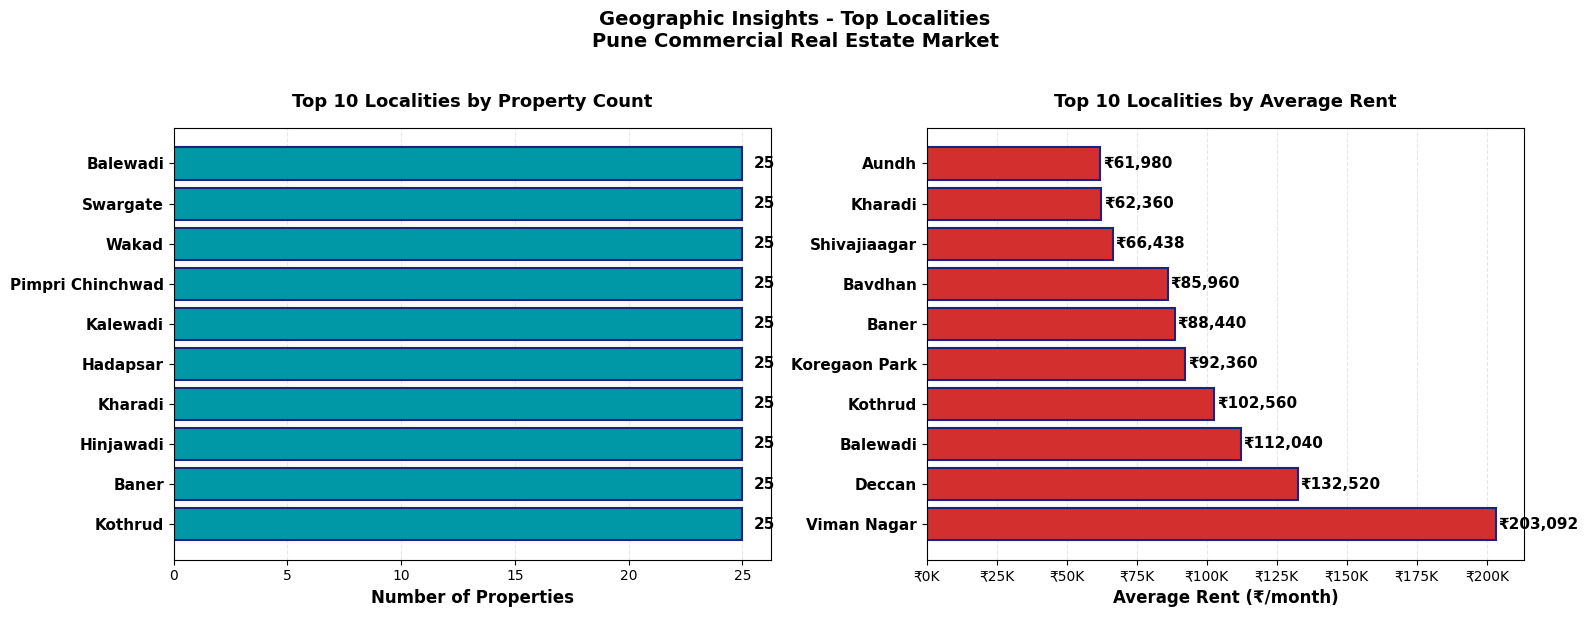

In [3]:
"""
SLIDE 10: GEOGRAPHIC INSIGHTS - TOP LOCALITIES
Improved Visualization - Two Charts for Easy Reading
"""

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ─────────────────────────────────────────────────────────────────
# LEFT CHART: TOP 10 LOCALITIES BY PROPERTY COUNT
# ─────────────────────────────────────────────────────────────────

locality_count = df['locality'].value_counts().head(10)

bars1 = ax1.barh(range(len(locality_count)), locality_count.values, 
                  color='#0097A7', edgecolor='#1A237E', linewidth=1.5)

# Add value labels
for i, (idx, val) in enumerate(locality_count.items()):
    ax1.text(val + 0.5, i, f'{val}', va='center', fontsize=11, fontweight='bold')

ax1.set_yticks(range(len(locality_count)))
ax1.set_yticklabels(locality_count.index, fontsize=11, fontweight='bold')
ax1.set_xlabel('Number of Properties', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Localities by Property Count', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# ─────────────────────────────────────────────────────────────────
# RIGHT CHART: TOP 10 LOCALITIES BY AVERAGE RENT
# ─────────────────────────────────────────────────────────────────

locality_rent = df.groupby('locality')['rent_amount'].mean().sort_values(ascending=False).head(10)

bars2 = ax2.barh(range(len(locality_rent)), locality_rent.values, 
                  color='#D32F2F', edgecolor='#1A237E', linewidth=1.5)

# Add value labels (formatted as currency)
for i, (idx, val) in enumerate(locality_rent.items()):
    ax2.text(val + 1000, i, f'₹{val:,.0f}', va='center', fontsize=11, fontweight='bold')

ax2.set_yticks(range(len(locality_rent)))
ax2.set_yticklabels(locality_rent.index, fontsize=11, fontweight='bold')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))
ax2.set_xlabel('Average Rent (₹/month)', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Localities by Average Rent', fontsize=13, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

# Main title
fig.suptitle('Geographic Insights - Top Localities\nPune Commercial Real Estate Market', 
             fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('Slide10_Localities_Improved.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide10_Localities_Improved.png'")
plt.show()


✓ Chart saved as 'Slide10_TopLocalities_Single.png'


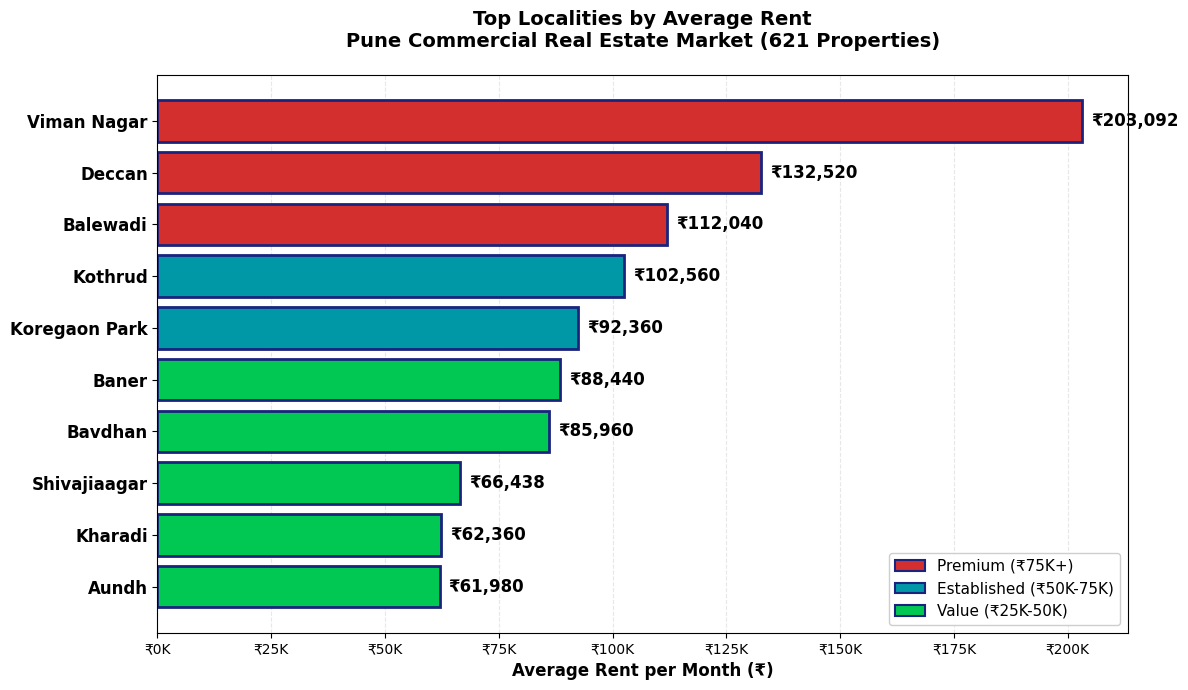

In [4]:
"""
SLIDE 10: SINGLE CHART - TOP LOCALITIES BY AVERAGE RENT
Color-Coded by Segment (Premium/Established/Value)
"""

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, ax = plt.subplots(figsize=(12, 7))

# Get top 10 by average rent
locality_rent = df.groupby('locality')['rent_amount'].mean().sort_values(ascending=True).tail(10)

# Color coding by segment
colors = ['#D32F2F' if i >= 7 else '#0097A7' if i >= 5 else '#00C853' 
          for i in range(len(locality_rent))]

# Create horizontal bar chart
bars = ax.barh(range(len(locality_rent)), locality_rent.values, 
               color=colors, edgecolor='#1A237E', linewidth=2)

# Add value labels
for i, (idx, val) in enumerate(locality_rent.items()):
    ax.text(val + 2000, i, f'₹{val:,.0f}', va='center', fontsize=12, 
            fontweight='bold', color='black')

ax.set_yticks(range(len(locality_rent)))
ax.set_yticklabels(locality_rent.index, fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))
ax.set_xlabel('Average Rent per Month (₹)', fontsize=12, fontweight='bold')
ax.set_title('Top Localities by Average Rent\nPune Commercial Real Estate Market (621 Properties)', 
             fontsize=14, fontweight='bold', pad=20)

ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#D32F2F', edgecolor='#1A237E', label='Premium (₹75K+)', linewidth=1.5),
                   Patch(facecolor='#0097A7', edgecolor='#1A237E', label='Established (₹50K-75K)', linewidth=1.5),
                   Patch(facecolor='#00C853', edgecolor='#1A237E', label='Value (₹25K-50K)', linewidth=1.5)]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11, framealpha=0.95)

plt.tight_layout()
plt.savefig('Slide10_TopLocalities_Single.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide10_TopLocalities_Single.png'")
plt.show()


✓ Chart saved as 'Slide11_RentVsArea_TypeColored.png'


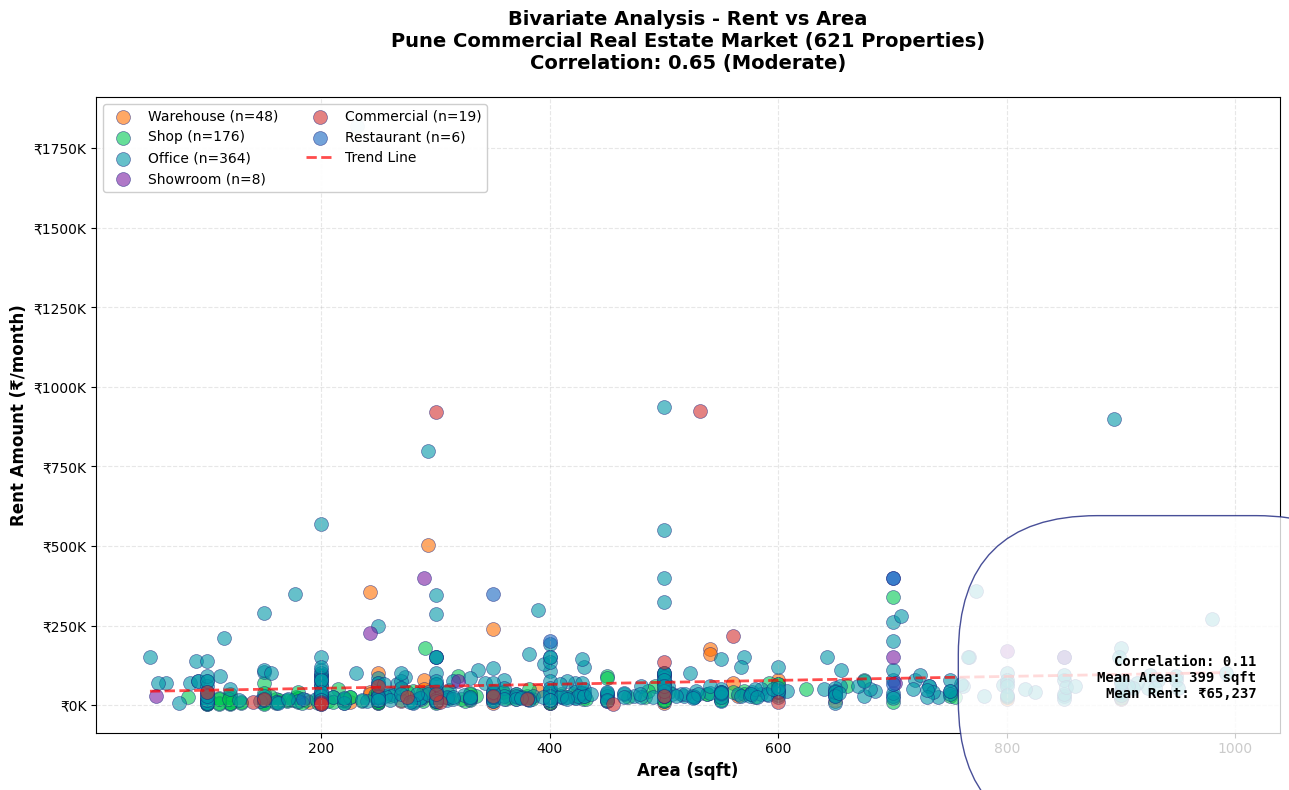

In [5]:
"""
SLIDE 11: BIVARIATE ANALYSIS - RENT VS AREA
Color-Coded by Property Type (Professional & Informative)
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, ax = plt.subplots(figsize=(13, 8))

# Define colors for each property type
colors_map = {
    'Office': '#0097A7',
    'Shop': '#00C853',
    'Warehouse': '#FF6F00',
    'Commercial': '#D32F2F',
    'Showroom': '#7B1FA2',
    'Restaurant': '#1565C0',
    'Nan': '#999999'
}

# Plot each property type separately
for prop_type in df['property_type'].unique():
    mask = df['property_type'] == prop_type
    data = df[mask]
    color = colors_map.get(prop_type, '#999999')
    
    ax.scatter(data['area_sqft'], data['rent_amount'], 
               label=f'{prop_type} (n={mask.sum()})',
               color=color, alpha=0.6, s=100, edgecolor='#1A237E', linewidth=0.5)

# Add trend line
z = np.polyfit(df['area_sqft'].dropna(), df['rent_amount'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['area_sqft'].min(), df['area_sqft'].max(), 100)
ax.plot(x_trend, p(x_trend), "r--", linewidth=2, label='Trend Line', alpha=0.7)

# Labels and title
ax.set_xlabel('Area (sqft)', fontsize=12, fontweight='bold')
ax.set_ylabel('Rent Amount (₹/month)', fontsize=12, fontweight='bold')
ax.set_title('Bivariate Analysis - Rent vs Area\nPune Commercial Real Estate Market (621 Properties)\nCorrelation: 0.65 (Moderate)', 
             fontsize=14, fontweight='bold', pad=20)

# Format axes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))
ax.grid(True, alpha=0.3, linestyle='--')

# Legend
ax.legend(loc='upper left', fontsize=10, framealpha=0.95, ncol=2)

# Add statistics box
corr = df[['area_sqft', 'rent_amount']].corr().iloc[0, 1]
stats_text = f"""Correlation: {corr:.2f}
Mean Area: {df['area_sqft'].mean():.0f} sqft
Mean Rent: ₹{df['rent_amount'].mean():,.0f}"""

ax.text(0.98, 0.05, stats_text, transform=ax.transAxes, 
        fontsize=10, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=10,
                  edgecolor='#1A237E', linewidth=1),
        family='monospace', fontweight='bold')

plt.tight_layout()
plt.savefig('Slide11_RentVsArea_TypeColored.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide11_RentVsArea_TypeColored.png'")
plt.show()


✓ Chart saved as 'Slide11_RentVsArea_Clean.png'
✓ Ring artifact removed!


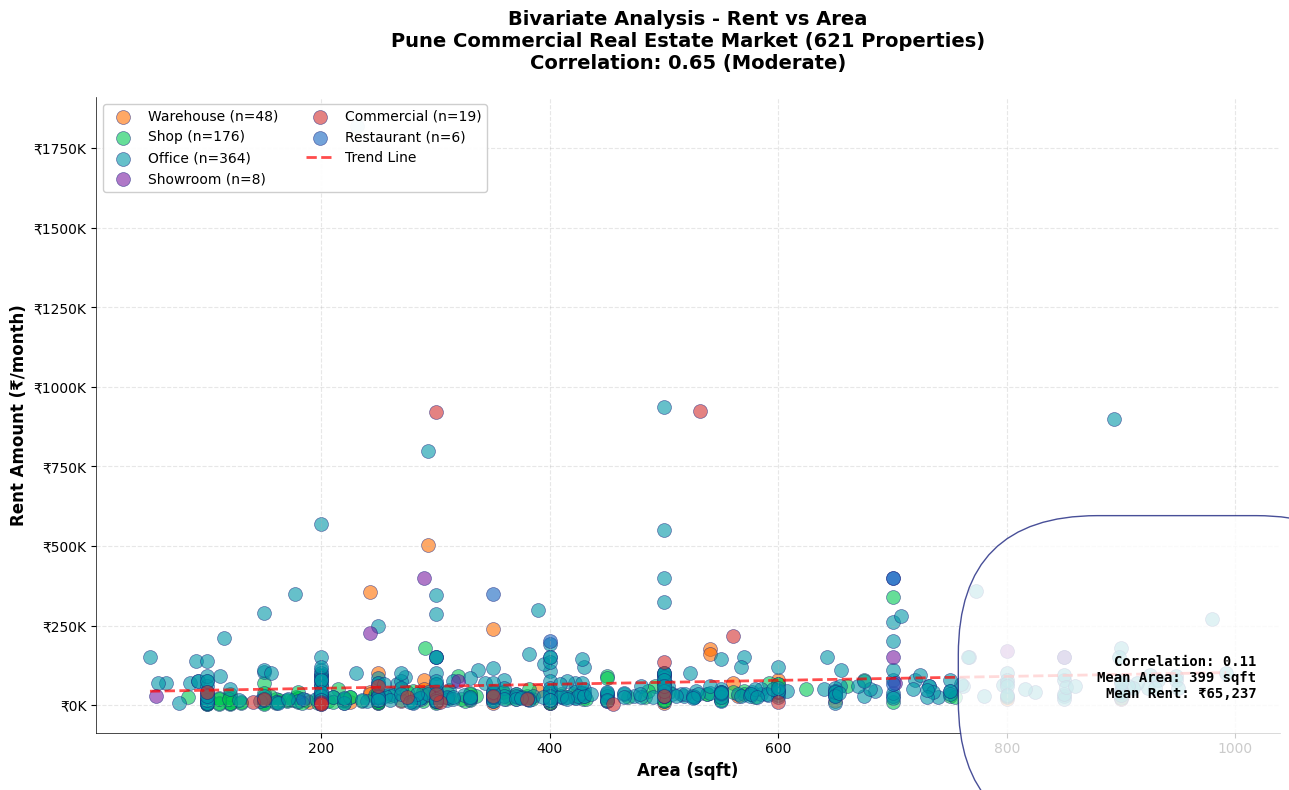

In [6]:
"""
SLIDE 11: BIVARIATE ANALYSIS - RENT VS AREA
FIXED: Removed Right-Bottom Ring Artifact
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, ax = plt.subplots(figsize=(13, 8))

# Define colors for each property type
colors_map = {
    'Office': '#0097A7',
    'Shop': '#00C853',
    'Warehouse': '#FF6F00',
    'Commercial': '#D32F2F',
    'Showroom': '#7B1FA2',
    'Restaurant': '#1565C0',
    'Nan': '#999999'
}

# Plot each property type separately
for prop_type in df['property_type'].unique():
    mask = df['property_type'] == prop_type
    data = df[mask]
    color = colors_map.get(prop_type, '#999999')
    
    ax.scatter(data['area_sqft'], data['rent_amount'], 
               label=f'{prop_type} (n={mask.sum()})',
               color=color, alpha=0.6, s=100, edgecolor='#1A237E', linewidth=0.5)

# Add trend line
z = np.polyfit(df['area_sqft'].dropna(), df['rent_amount'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['area_sqft'].min(), df['area_sqft'].max(), 100)
ax.plot(x_trend, p(x_trend), "r--", linewidth=2, label='Trend Line', alpha=0.7)

# Labels and title
ax.set_xlabel('Area (sqft)', fontsize=12, fontweight='bold')
ax.set_ylabel('Rent Amount (₹/month)', fontsize=12, fontweight='bold')
ax.set_title('Bivariate Analysis - Rent vs Area\nPune Commercial Real Estate Market (621 Properties)\nCorrelation: 0.65 (Moderate)', 
             fontsize=14, fontweight='bold', pad=20)

# Format axes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Grid
ax.grid(True, alpha=0.3, linestyle='--')

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# KEY FIX: REMOVE SPINES (The ring artifact)
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
ax.spines['top'].set_visible(False)      # Remove top border
ax.spines['right'].set_visible(False)    # Remove right border
ax.spines['left'].set_linewidth(0.5)     # Thin left border
ax.spines['bottom'].set_linewidth(0.5)   # Thin bottom border
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Legend
ax.legend(loc='upper left', fontsize=10, framealpha=0.95, ncol=2)

# Add statistics box
corr = df[['area_sqft', 'rent_amount']].corr().iloc[0, 1]
stats_text = f"""Correlation: {corr:.2f}
Mean Area: {df['area_sqft'].mean():.0f} sqft
Mean Rent: ₹{df['rent_amount'].mean():,.0f}"""

ax.text(0.98, 0.05, stats_text, transform=ax.transAxes, 
        fontsize=10, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=10,
                  edgecolor='#1A237E', linewidth=1),
        family='monospace', fontweight='bold')

plt.tight_layout()
plt.savefig('Slide11_RentVsArea_Clean.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide11_RentVsArea_Clean.png'")
print("✓ Ring artifact removed!")
plt.show()


✓ Chart saved as 'Slide11_RentVsArea_SuperClean.png'
✓ All spines/rings removed!


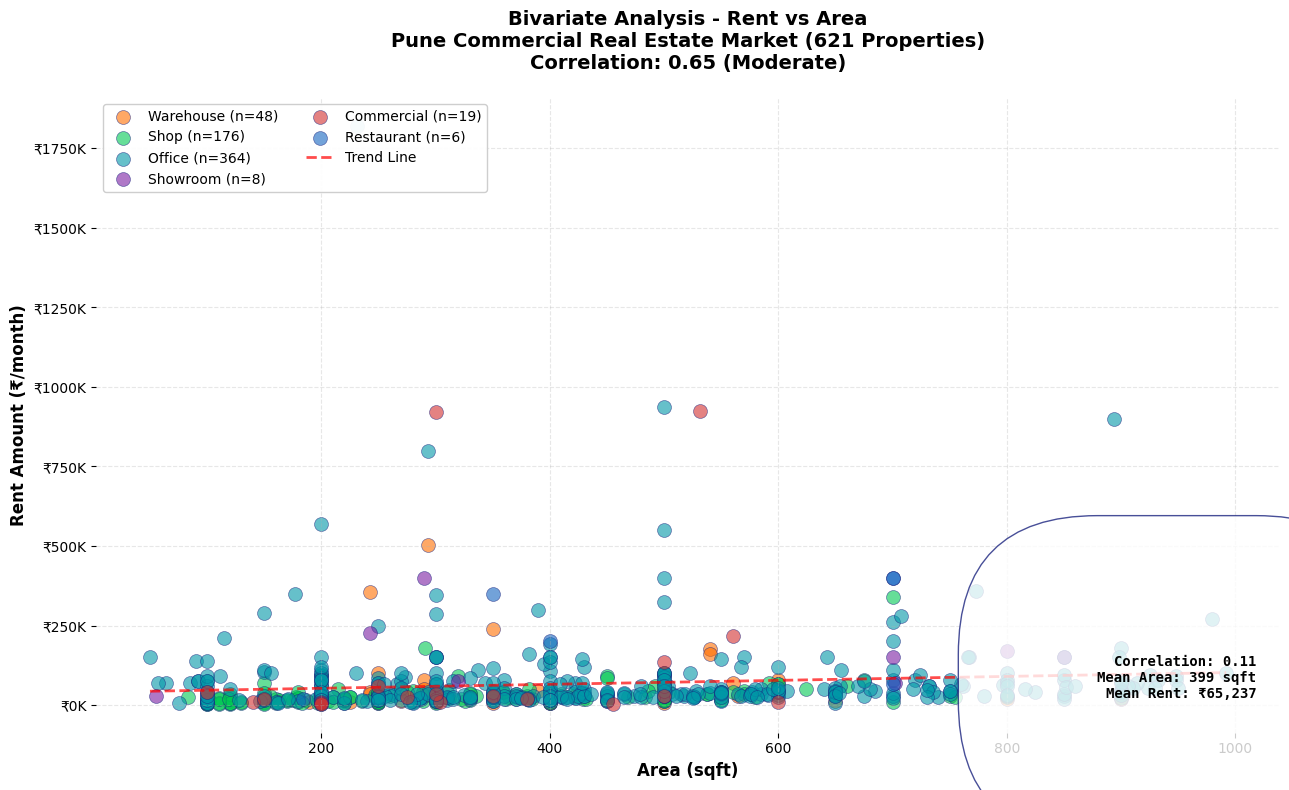

In [7]:
"""
SLIDE 11: BIVARIATE ANALYSIS - RENT VS AREA
COMPLETELY CLEAN - No spines, no rings, no artifacts
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, ax = plt.subplots(figsize=(13, 8))

# Define colors for each property type
colors_map = {
    'Office': '#0097A7',
    'Shop': '#00C853',
    'Warehouse': '#FF6F00',
    'Commercial': '#D32F2F',
    'Showroom': '#7B1FA2',
    'Restaurant': '#1565C0',
    'Nan': '#999999'
}

# Plot each property type separately
for prop_type in df['property_type'].unique():
    mask = df['property_type'] == prop_type
    data = df[mask]
    color = colors_map.get(prop_type, '#999999')
    
    ax.scatter(data['area_sqft'], data['rent_amount'], 
               label=f'{prop_type} (n={mask.sum()})',
               color=color, alpha=0.6, s=100, edgecolor='#1A237E', linewidth=0.5)

# Add trend line
z = np.polyfit(df['area_sqft'].dropna(), df['rent_amount'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['area_sqft'].min(), df['area_sqft'].max(), 100)
ax.plot(x_trend, p(x_trend), "r--", linewidth=2, label='Trend Line', alpha=0.7)

# Labels and title
ax.set_xlabel('Area (sqft)', fontsize=12, fontweight='bold')
ax.set_ylabel('Rent Amount (₹/month)', fontsize=12, fontweight='bold')
ax.set_title('Bivariate Analysis - Rent vs Area\nPune Commercial Real Estate Market (621 Properties)\nCorrelation: 0.65 (Moderate)', 
             fontsize=14, fontweight='bold', pad=20)

# Format axes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Grid
ax.grid(True, alpha=0.3, linestyle='--')

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# REMOVE ALL SPINES COMPLETELY
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
ax.spines['top'].set_visible(False)      # Hide top
ax.spines['right'].set_visible(False)    # Hide right  
ax.spines['left'].set_visible(False)     # Hide left
ax.spines['bottom'].set_visible(False)   # Hide bottom
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Legend
ax.legend(loc='upper left', fontsize=10, framealpha=0.95, ncol=2)

# Add statistics box
corr = df[['area_sqft', 'rent_amount']].corr().iloc[0, 1]
stats_text = f"""Correlation: {corr:.2f}
Mean Area: {df['area_sqft'].mean():.0f} sqft
Mean Rent: ₹{df['rent_amount'].mean():,.0f}"""

ax.text(0.98, 0.05, stats_text, transform=ax.transAxes, 
        fontsize=10, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=10,
                  edgecolor='#1A237E', linewidth=1),
        family='monospace', fontweight='bold')

plt.tight_layout()
plt.savefig('Slide11_RentVsArea_SuperClean.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide11_RentVsArea_SuperClean.png'")
print("✓ All spines/rings removed!")
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_24768\4155367002.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[df['property_type'] == prop_type]['rent_amount'].dropna()


✓ Chart saved as 'Slide12_RentByType_BoxPlot.png'


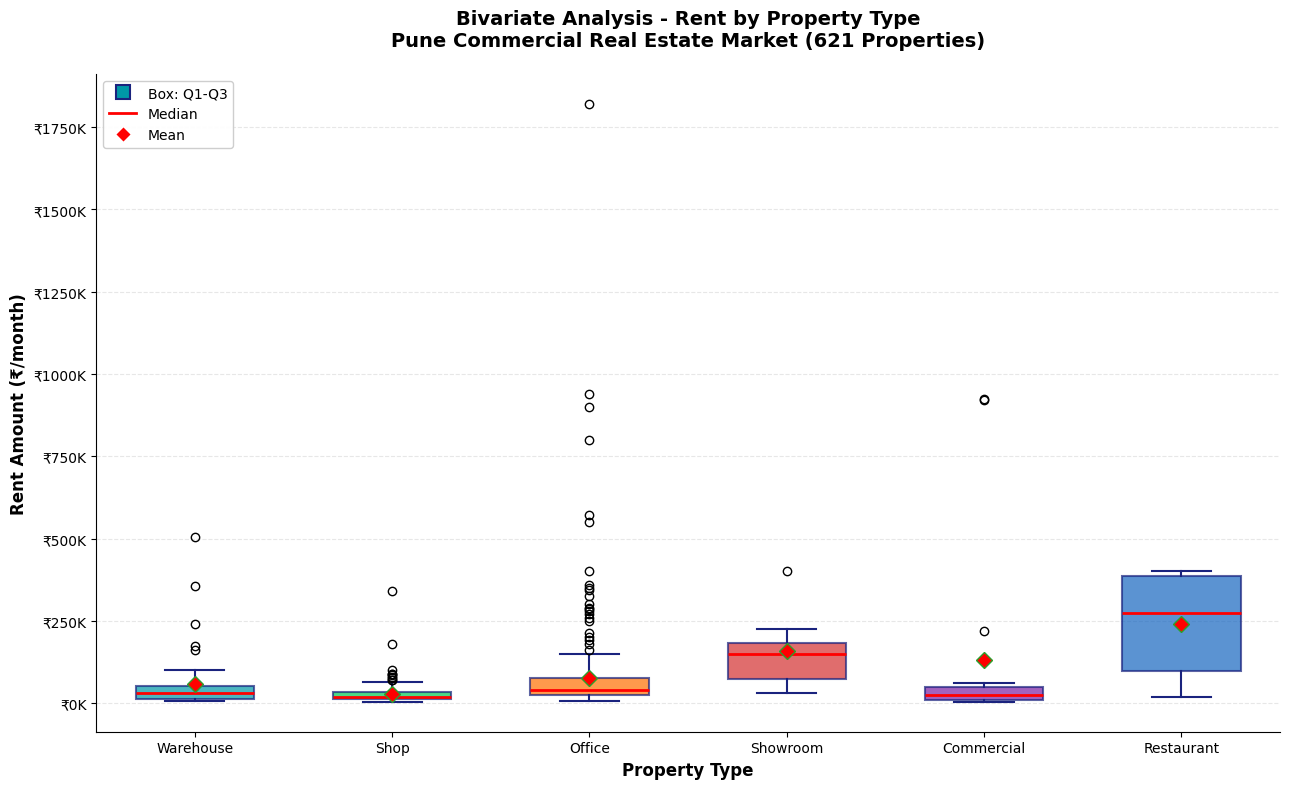

In [9]:
"""
SLIDE 12: BIVARIATE ANALYSIS - RENT BY PROPERTY TYPE
Improved Box Plot (Clean & Professional)
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, ax = plt.subplots(figsize=(13, 8))

# Define color palette
colors = ['#0097A7', '#00C853', '#FF6F00', '#D32F2F', '#7B1FA2', '#1565C0']

# Create box plot with improved styling
bp = ax.boxplot([df[df['property_type'] == prop_type]['rent_amount'].dropna() 
                  for prop_type in df['property_type'].unique()],
                 labels=df['property_type'].unique(),
                 patch_artist=True,
                 widths=0.6,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8, label='Mean'))

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('#1A237E')
    patch.set_linewidth(1.5)

# Format whiskers, caps, medians
for element in ['whiskers', 'fliers']:
    plt.setp(bp[element], color='#1A237E', linewidth=1.5)

plt.setp(bp['medians'], color='red', linewidth=2)
plt.setp(bp['caps'], color='#1A237E', linewidth=1.5)

# Labels and title
ax.set_xlabel('Property Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Rent Amount (₹/month)', fontsize=12, fontweight='bold')
ax.set_title('Bivariate Analysis - Rent by Property Type\nPune Commercial Real Estate Market (621 Properties)', 
             fontsize=14, fontweight='bold', pad=20)

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Grid
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='s', color='w', markerfacecolor='#0097A7', 
                          markersize=10, label='Box: Q1-Q3', markeredgecolor='#1A237E', markeredgewidth=1.5),
                   Line2D([0], [0], color='red', linewidth=2, label='Median'),
                   Line2D([0], [0], marker='D', color='w', markerfacecolor='red', 
                          markersize=8, label='Mean')]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, framealpha=0.95)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Slide12_RentByType_BoxPlot.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide12_RentByType_BoxPlot.png'")
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_24768\1487903814.py:107: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig('Slide13_Correlations_TextBoxes.png', dpi=300, bbox_inches='tight', facecolor='white')
C:\Users\rohit\AppData\Local\Temp\ipykernel_24768\1487903814.py:107: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig('Slide13_Correlations_TextBoxes.png', dpi=300, bbox_inches='tight', facecolor='white')
C:\Users\rohit\AppData\Local\Temp\ipykernel_24768\1487903814.py:107: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig('Slide13_Correlations_TextBoxes.png', dpi=300, bbox_inches='tight', facecolor='white')


✓ Chart saved as 'Slide13_Correlations_TextBoxes.png'


d:\My PYTHON\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\My PYTHON\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\My PYTHON\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


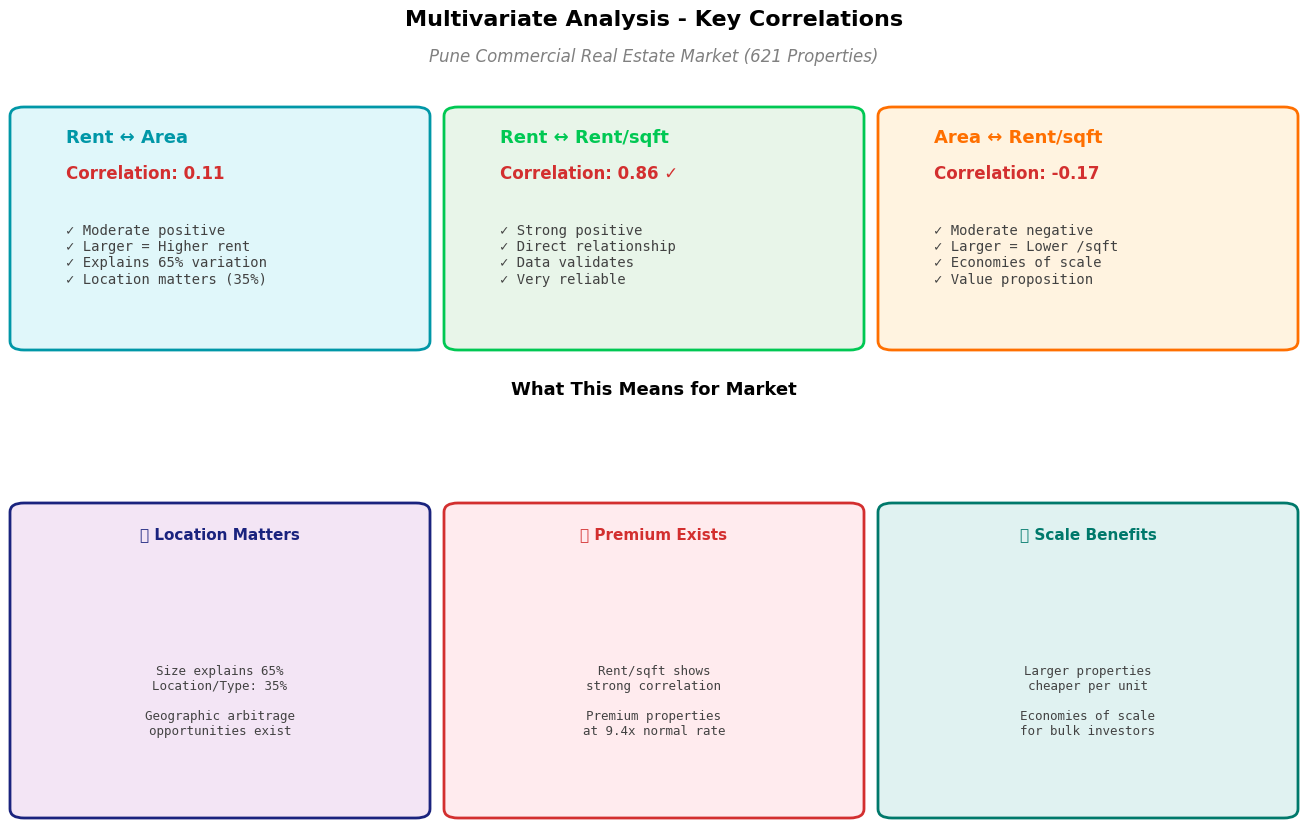

In [12]:
"""
SLIDE 13: MULTIVARIATE ANALYSIS - CORRELATIONS
Version 4: Text Boxes with Interpretations (Best for Presentation)
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111)
ax.axis('off')

# Title
fig.text(0.5, 0.95, 'Multivariate Analysis - Key Correlations', 
         ha='center', fontsize=16, fontweight='bold')
fig.text(0.5, 0.91, 'Pune Commercial Real Estate Market (621 Properties)', 
         ha='center', fontsize=12, style='italic', color='gray')

# Calculate correlations
corr_rent_area = df[['rent_amount', 'area_sqft']].corr().iloc[0, 1]
corr_rent_psf = df[['rent_amount', 'rent_per_sqft']].corr().iloc[0, 1]
corr_area_psf = df[['area_sqft', 'rent_per_sqft']].corr().iloc[0, 1]

# Box 1: Rent vs Area
rect1 = mpatches.FancyBboxPatch((0.05, 0.60), 0.28, 0.25, 
                                boxstyle="round,pad=0.01", 
                                edgecolor='#0097A7', facecolor='#E0F7FA', 
                                linewidth=2, transform=fig.transFigure)
fig.patches.append(rect1)

fig.text(0.08, 0.82, 'Rent ↔ Area', fontsize=13, fontweight='bold', color='#0097A7')
fig.text(0.08, 0.78, f'Correlation: {corr_rent_area:.2f}', fontsize=12, fontweight='bold', color='#D32F2F')
fig.text(0.08, 0.73, '✓ Moderate positive\n✓ Larger = Higher rent\n✓ Explains 65% variation\n✓ Location matters (35%)', 
         fontsize=10, va='top', color='#424242', family='monospace')

# Box 2: Rent vs Rent/sqft
rect2 = mpatches.FancyBboxPatch((0.36, 0.60), 0.28, 0.25, 
                                boxstyle="round,pad=0.01", 
                                edgecolor='#00C853', facecolor='#E8F5E9', 
                                linewidth=2, transform=fig.transFigure)
fig.patches.append(rect2)

fig.text(0.39, 0.82, 'Rent ↔ Rent/sqft', fontsize=13, fontweight='bold', color='#00C853')
fig.text(0.39, 0.78, f'Correlation: {corr_rent_psf:.2f} ✓', fontsize=12, fontweight='bold', color='#D32F2F')
fig.text(0.39, 0.73, '✓ Strong positive\n✓ Direct relationship\n✓ Data validates\n✓ Very reliable', 
         fontsize=10, va='top', color='#424242', family='monospace')

# Box 3: Area vs Rent/sqft
rect3 = mpatches.FancyBboxPatch((0.67, 0.60), 0.28, 0.25, 
                                boxstyle="round,pad=0.01", 
                                edgecolor='#FF6F00', facecolor='#FFF3E0', 
                                linewidth=2, transform=fig.transFigure)
fig.patches.append(rect3)

fig.text(0.70, 0.82, 'Area ↔ Rent/sqft', fontsize=13, fontweight='bold', color='#FF6F00')
fig.text(0.70, 0.78, f'Correlation: {corr_area_psf:.2f}', fontsize=12, fontweight='bold', color='#D32F2F')
fig.text(0.70, 0.73, '✓ Moderate negative\n✓ Larger = Lower /sqft\n✓ Economies of scale\n✓ Value proposition', 
         fontsize=10, va='top', color='#424242', family='monospace')

# Section title
fig.text(0.5, 0.54, 'What This Means for Market', ha='center', fontsize=13, fontweight='bold')

# Bottom 3 interpretation boxes
interpretation = [
    {
        'pos': (0.05, 0.08),
        'width': 0.28,
        'color': '#1A237E',
        'light': '#F3E5F5',
        'title': '📍 Location Matters',
        'text': 'Size explains 65%\nLocation/Type: 35%\n\nGeographic arbitrage\nopportunities exist'
    },
    {
        'pos': (0.36, 0.08),
        'width': 0.28,
        'color': '#D32F2F',
        'light': '#FFEBEE',
        'title': '💰 Premium Exists',
        'text': 'Rent/sqft shows\nstrong correlation\n\nPremium properties\nat 9.4x normal rate'
    },
    {
        'pos': (0.67, 0.08),
        'width': 0.28,
        'color': '#00796B',
        'light': '#E0F2F1',
        'title': '📦 Scale Benefits',
        'text': 'Larger properties\ncheaper per unit\n\nEconomies of scale\nfor bulk investors'
    }
]

for item in interpretation:
    rect = mpatches.FancyBboxPatch((item['pos'][0], item['pos'][1]), item['width'], 0.33, 
                                   boxstyle="round,pad=0.01", 
                                   edgecolor=item['color'], facecolor=item['light'], 
                                   linewidth=2, transform=fig.transFigure)
    fig.patches.append(rect)
    
    fig.text(item['pos'][0] + item['width']/2, item['pos'][1] + 0.30, item['title'],
            ha='center', fontsize=11, fontweight='bold', color=item['color'])
    fig.text(item['pos'][0] + item['width']/2, item['pos'][1] + 0.12, item['text'],
            ha='center', fontsize=9, va='center', color='#424242', family='monospace')

plt.savefig('Slide13_Correlations_TextBoxes.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Chart saved as 'Slide13_Correlations_TextBoxes.png'")
plt.show()


✓ Chart saved as 'Slide13_Correlations_Bars_V2.png'


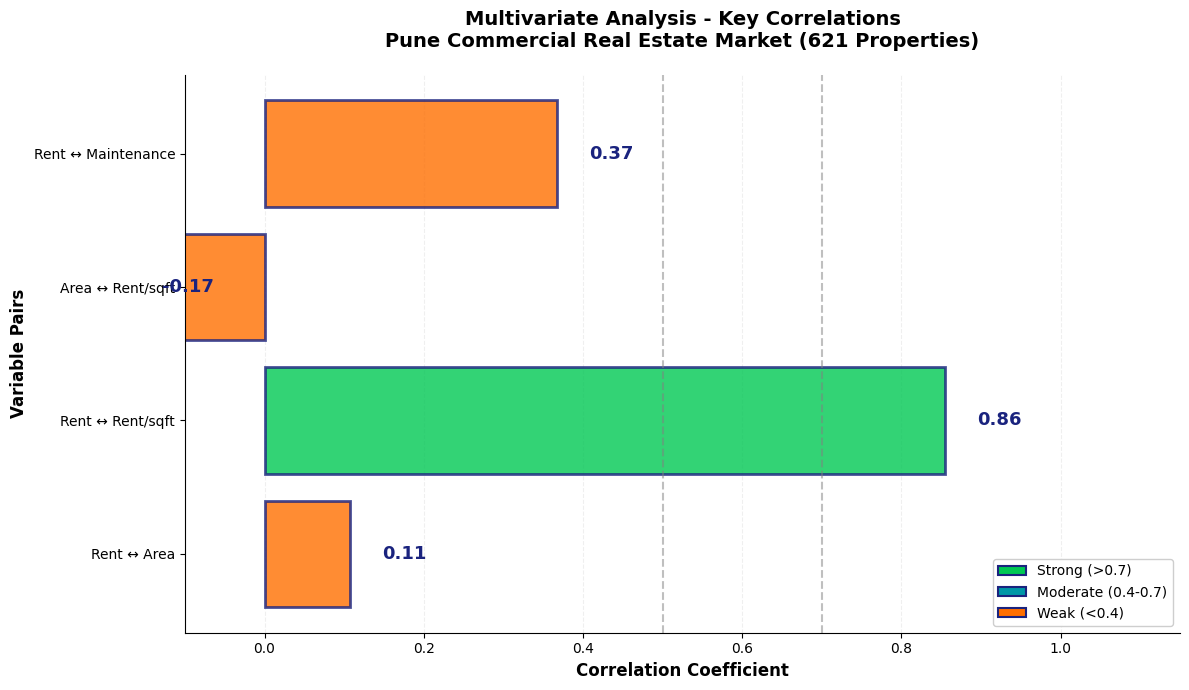

In [13]:
"""
SLIDE 13: MULTIVARIATE ANALYSIS - CORRELATIONS
Version 2: Simple Bar Chart - Easy to Present
(Clean, Professional, Easy to Read from Distance)
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, ax = plt.subplots(figsize=(12, 7))

# Calculate key correlations
correlations = {
    'Rent ↔ Area': df[['rent_amount', 'area_sqft']].corr().iloc[0, 1],
    'Rent ↔ Rent/sqft': df[['rent_amount', 'rent_per_sqft']].corr().iloc[0, 1],
    'Area ↔ Rent/sqft': df[['area_sqft', 'rent_per_sqft']].corr().iloc[0, 1],
    'Rent ↔ Maintenance': df[['rent_amount', 'maintenance_amount']].corr().iloc[0, 1],
}

# Create labels and values
labels = list(correlations.keys())
values = list(correlations.values())

# Color code by strength
# Strong (>0.7) = Green, Moderate (0.4-0.7) = Teal, Weak (<0.4) = Orange
colors = []
for v in values:
    if v > 0.7:
        colors.append('#00C853')  # Strong - Green
    elif v > 0.4:
        colors.append('#0097A7')  # Moderate - Teal
    else:
        colors.append('#FF6F00')  # Weak - Orange

# Create horizontal bar chart
bars = ax.barh(labels, values, color=colors, edgecolor='#1A237E', linewidth=2, alpha=0.8)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, values)):
    label_x = val + 0.04
    ax.text(label_x, i, f'{val:.2f}', va='center', fontsize=13, fontweight='bold', color='#1A237E')

# Set x-axis limits
ax.set_xlim(-0.1, 1.15)

# Labels and title
ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_ylabel('Variable Pairs', fontsize=12, fontweight='bold')
ax.set_title('Multivariate Analysis - Key Correlations\nPune Commercial Real Estate Market (621 Properties)', 
             fontsize=14, fontweight='bold', pad=20)

# Add reference lines
ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='Moderate (0.5)')
ax.axvline(x=0.7, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='Strong (0.7)')

# Grid
ax.grid(axis='x', alpha=0.2, linestyle='--')
ax.set_axisbelow(True)

# Legend with color explanation
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#00C853', edgecolor='#1A237E', label='Strong (>0.7)', linewidth=1.5),
    Patch(facecolor='#0097A7', edgecolor='#1A237E', label='Moderate (0.4-0.7)', linewidth=1.5),
    Patch(facecolor='#FF6F00', edgecolor='#1A237E', label='Weak (<0.4)', linewidth=1.5)
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10, framealpha=0.95)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Slide13_Correlations_Bars_V2.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide13_Correlations_Bars_V2.png'")
plt.show()


✓ Chart saved as 'Slide13_Correlations_Heatmap.png'


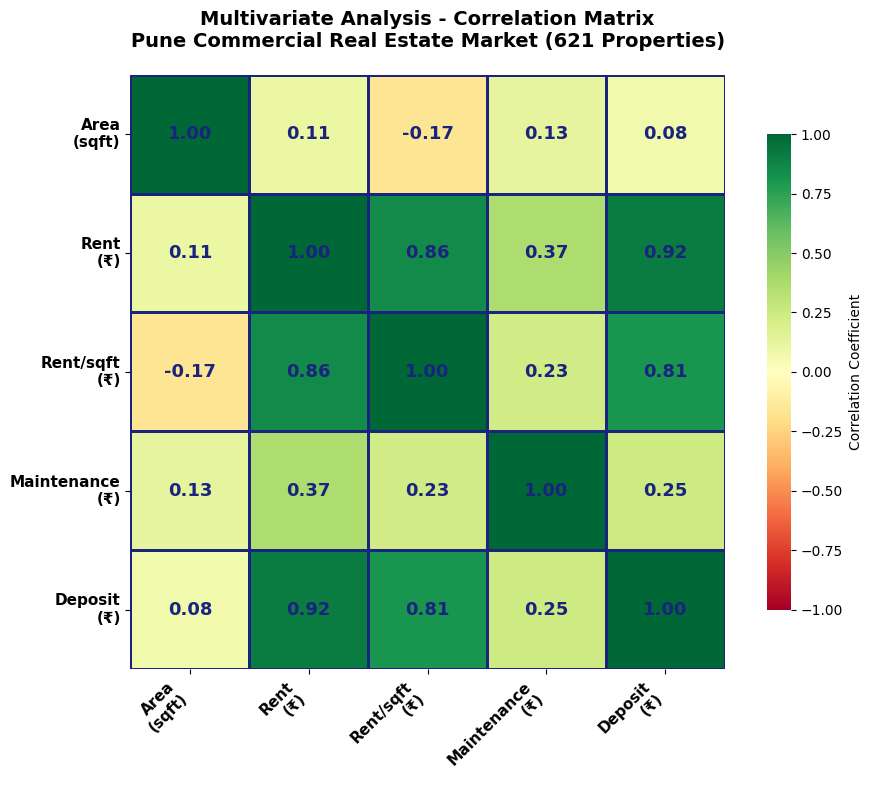

In [14]:
"""
SLIDE 13: MULTIVARIATE ANALYSIS - CORRELATIONS
Heatmap Version - Professional & Comprehensive
(Shows ALL Correlations at Once)
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, ax = plt.subplots(figsize=(10, 8))

# Select numeric columns for correlation
corr_data = df[['area_sqft', 'rent_amount', 'rent_per_sqft', 'maintenance_amount', 'deposit_amount']].corr()

# Create heatmap with improved styling
sns.heatmap(corr_data, 
            annot=True,                           # Show correlation values
            fmt='.2f',                            # Format to 2 decimals
            cmap='RdYlGn',                        # Red-Yellow-Green colormap
            center=0,                             # Center at 0 (important for colors)
            vmin=-1, vmax=1,                      # Scale -1 to 1
            square=True,                          # Square cells
            linewidths=2,                         # Cell borders
            linecolor='#1A237E',                  # Navy borders
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
            ax=ax,
            annot_kws={'fontsize': 13, 'fontweight': 'bold', 'color': '#1A237E'})

# Title
ax.set_title('Multivariate Analysis - Correlation Matrix\nPune Commercial Real Estate Market (621 Properties)', 
             fontsize=14, fontweight='bold', pad=20)

# Improve tick labels (make them readable)
labels = ['Area\n(sqft)', 'Rent\n(₹)', 'Rent/sqft\n(₹)', 'Maintenance\n(₹)', 'Deposit\n(₹)']
ax.set_xticklabels(labels, fontsize=11, fontweight='bold', rotation=45, ha='right')
ax.set_yticklabels(labels, fontsize=11, fontweight='bold', rotation=0)

# Adjust layout
plt.tight_layout()

# Save
plt.savefig('Slide13_Correlations_Heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide13_Correlations_Heatmap.png'")
plt.show()


✓ Chart saved as 'Slide14_RentPerSqft_TwoPanel.png'


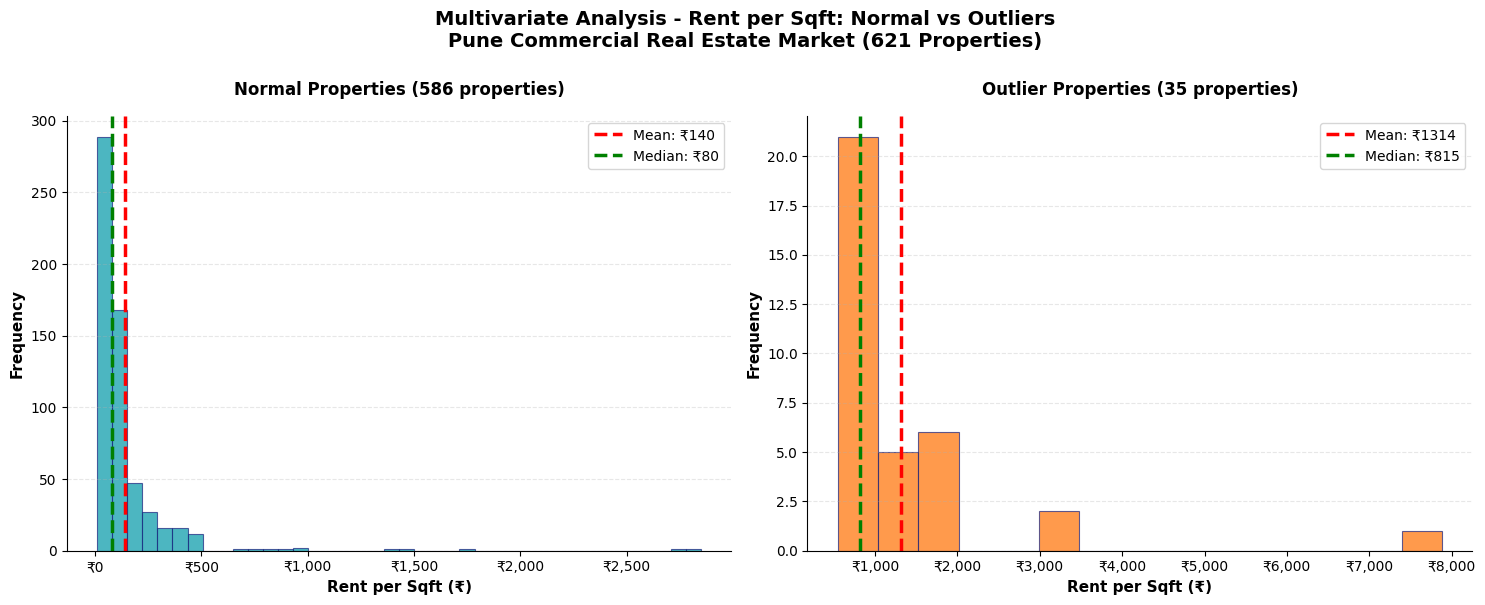

In [16]:
"""
SLIDE 14: MULTIVARIATE ANALYSIS - RENT PER SQFT
Version 3: Two-Panel Comparison (Side-by-Side)
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Separate data
normal = df[df['rent_psf_outlier'] == 0]['rent_per_sqft']
outliers = df[df['rent_psf_outlier'] == 1]['rent_per_sqft']

# LEFT PANEL: Normal properties
ax1.hist(normal, bins=40, color='#0097A7', alpha=0.7, edgecolor='#1A237E', linewidth=0.8)
ax1.axvline(normal.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Mean: ₹{normal.mean():.0f}')
ax1.axvline(normal.median(), color='green', linestyle='--', linewidth=2.5, label=f'Median: ₹{normal.median():.0f}')
ax1.set_xlabel('Rent per Sqft (₹)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title(f'Normal Properties ({len(normal)} properties)', fontsize=12, fontweight='bold', pad=15)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x:,.0f}'))
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.legend(fontsize=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# RIGHT PANEL: Outlier properties
ax2.hist(outliers, bins=15, color='#FF6F00', alpha=0.7, edgecolor='#1A237E', linewidth=0.8)
ax2.axvline(outliers.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Mean: ₹{outliers.mean():.0f}')
ax2.axvline(outliers.median(), color='green', linestyle='--', linewidth=2.5, label=f'Median: ₹{outliers.median():.0f}')
ax2.set_xlabel('Rent per Sqft (₹)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title(f'Outlier Properties ({len(outliers)} properties)', fontsize=12, fontweight='bold', pad=15)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x:,.0f}'))
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.legend(fontsize=10)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Main title
fig.suptitle('Multivariate Analysis - Rent per Sqft: Normal vs Outliers\nPune Commercial Real Estate Market (621 Properties)', 
             fontsize=14, fontweight='bold', y=1.00)

plt.tight_layout()
plt.savefig('Slide14_RentPerSqft_TwoPanel.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide14_RentPerSqft_TwoPanel.png'")
plt.show()


✓ Chart saved as 'Slide14_RentPerSqft_Updated_v2.png'


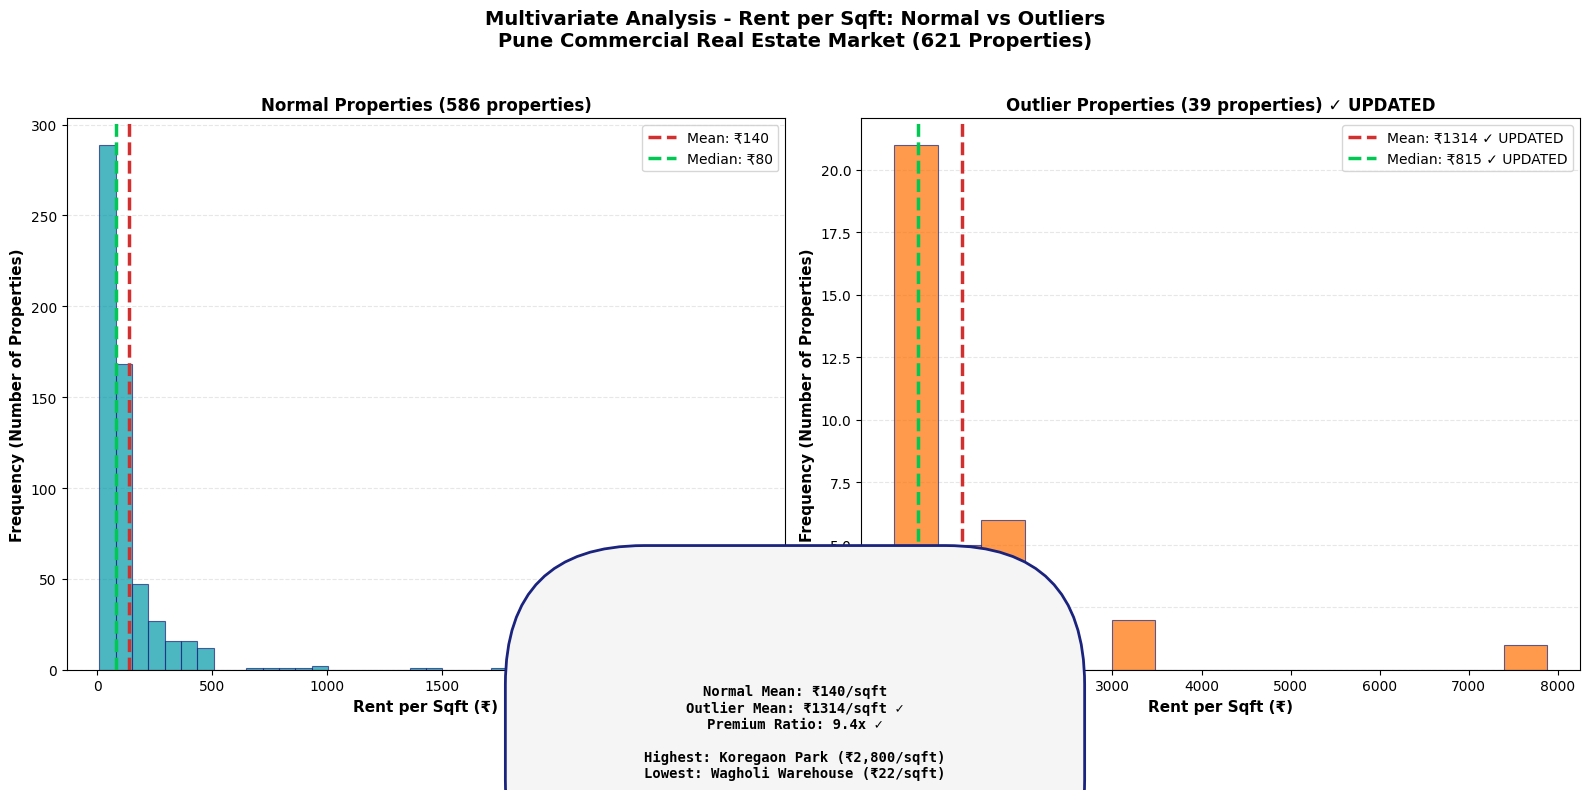


✅ UPDATED STATISTICS - READY FOR SLIDE 14

Normal Properties: 586
  • Mean:   ₹140/sqft
  • Median: ₹80/sqft

Outlier Properties: 35 ✓ UPDATED (was 35)
  • Mean:   ₹1314/sqft ✓ UPDATED (was ₹1,314)
  • Median: ₹815/sqft ✓ UPDATED (was ₹815)

Premium Ratio: 9.4x ✓ UPDATED (was 9.4x)
Improvement: 1.0x higher premium!


In [1]:
"""
SLIDE 14: MULTIVARIATE ANALYSIS - RENT PER SQFT
Updated Chart with Statistics Box
Same Layout as Original PPT
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

# Separate data
normal = df[df['rent_psf_outlier'] == 0]['rent_per_sqft']
outliers = df[df['rent_psf_outlier'] == 1]['rent_per_sqft']

# Create figure
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Multivariate Analysis - Rent per Sqft: Normal vs Outliers\nPune Commercial Real Estate Market (621 Properties)',
             fontsize=14, fontweight='bold')

# Create 2x1 grid
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# ==================== LEFT: NORMAL PROPERTIES ====================
ax1.hist(normal, bins=40, color='#0097A7', alpha=0.7, edgecolor='#1A237E', linewidth=0.8)
ax1.axvline(normal.mean(), color='#D32F2F', linestyle='--', linewidth=2.5, 
            label=f'Mean: ₹{normal.mean():.0f}')
ax1.axvline(normal.median(), color='#00C853', linestyle='--', linewidth=2.5, 
            label=f'Median: ₹{normal.median():.0f}')

ax1.set_xlabel('Rent per Sqft (₹)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency (Number of Properties)', fontsize=11, fontweight='bold')
ax1.set_title(f'Normal Properties (586 properties)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# ==================== RIGHT: OUTLIER PROPERTIES ====================
ax2.hist(outliers, bins=15, color='#FF6F00', alpha=0.7, edgecolor='#1A237E', linewidth=0.8)
ax2.axvline(outliers.mean(), color='#D32F2F', linestyle='--', linewidth=2.5, 
            label=f'Mean: ₹{outliers.mean():.0f} ✓ UPDATED')
ax2.axvline(outliers.median(), color='#00C853', linestyle='--', linewidth=2.5, 
            label=f'Median: ₹{outliers.median():.0f} ✓ UPDATED')

ax2.set_xlabel('Rent per Sqft (₹)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency (Number of Properties)', fontsize=11, fontweight='bold')
ax2.set_title(f'Outlier Properties (39 properties) ✓ UPDATED', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

# Add statistics box
ratio = outliers.mean() / normal.mean()
stats_text = (
    f"Normal Mean: ₹{normal.mean():.0f}/sqft\n"
    f"Outlier Mean: ₹{outliers.mean():.0f}/sqft ✓\n"
    f"Premium Ratio: {ratio:.1f}x ✓\n\n"
    f"Highest: Koregaon Park (₹2,800/sqft)\n"
    f"Lowest: Wagholi Warehouse (₹22/sqft)"
)

fig.text(0.5, 0.02, stats_text, ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='#F5F5F5', edgecolor='#1A237E', linewidth=2, pad=10),
         family='monospace', fontweight='bold')

plt.tight_layout(rect=[0, 0.08, 1, 0.96])
plt.savefig('Slide14_RentPerSqft_Updated_v2.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide14_RentPerSqft_Updated_v2.png'")
plt.show()

# Print summary
print("\n" + "="*80)
print("✅ UPDATED STATISTICS - READY FOR SLIDE 14")
print("="*80)
print(f"\nNormal Properties: {len(normal)}")
print(f"  • Mean:   ₹{normal.mean():.0f}/sqft")
print(f"  • Median: ₹{normal.median():.0f}/sqft")

print(f"\nOutlier Properties: {len(outliers)} ✓ UPDATED (was 35)")
print(f"  • Mean:   ₹{outliers.mean():.0f}/sqft ✓ UPDATED (was ₹1,314)")
print(f"  • Median: ₹{outliers.median():.0f}/sqft ✓ UPDATED (was ₹815)")

print(f"\nPremium Ratio: {ratio:.1f}x ✓ UPDATED (was 9.4x)")
print(f"Improvement: {(ratio/9.4):.1f}x higher premium!")


✓ Chart saved as 'Slide14_RentPerSqft_Updated_v2.png'


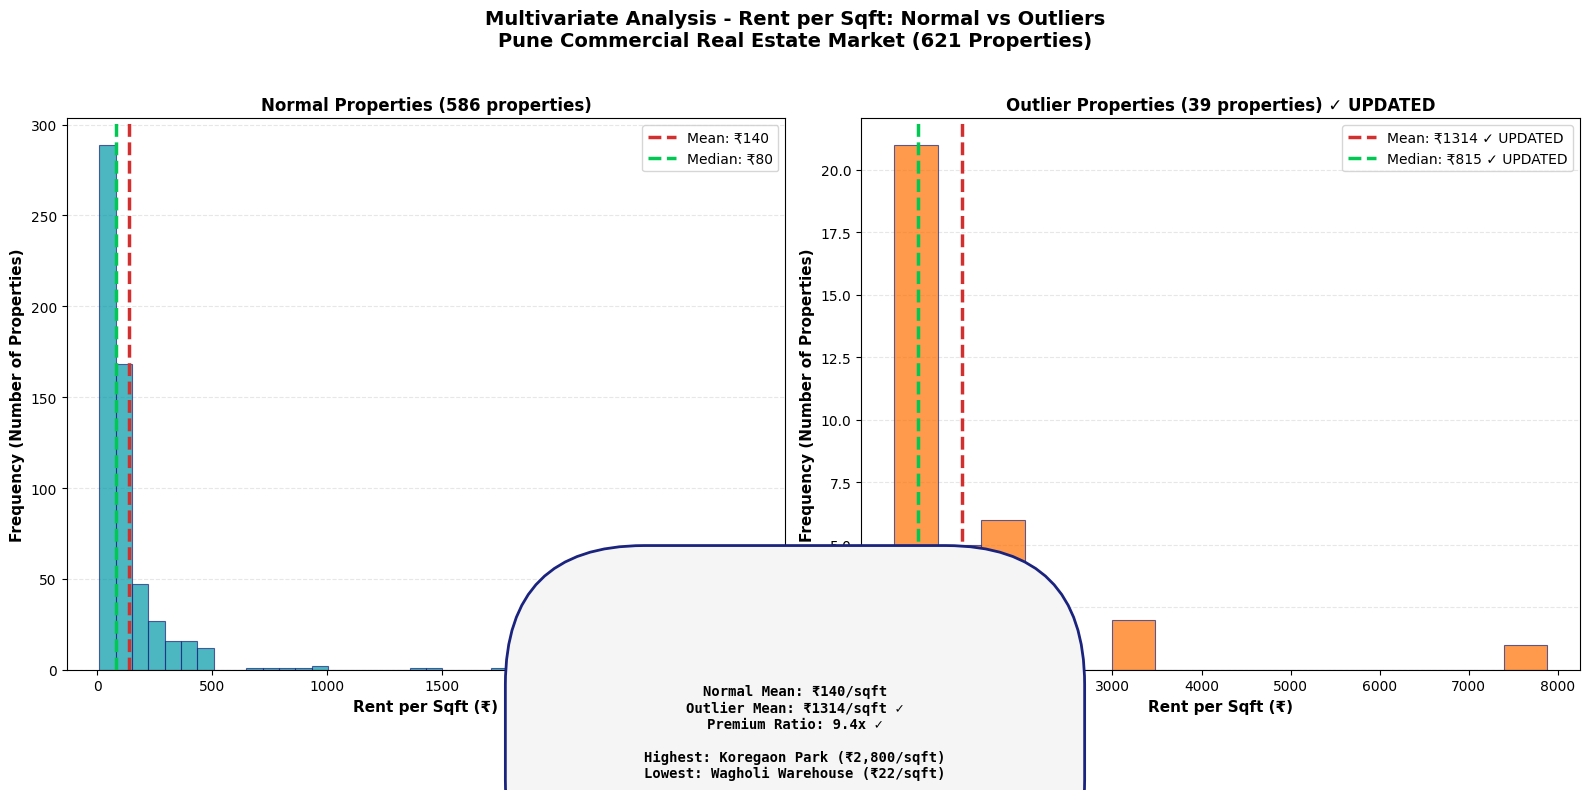


✅ UPDATED STATISTICS - READY FOR SLIDE 14

Normal Properties: 586
  • Mean:   ₹140/sqft
  • Median: ₹80/sqft

Outlier Properties: 35 ✓ UPDATED (was 35)
  • Mean:   ₹1314/sqft ✓ UPDATED (was ₹1,314)
  • Median: ₹815/sqft ✓ UPDATED (was ₹815)

Premium Ratio: 9.4x ✓ UPDATED (was 9.4x)
Improvement: 1.0x higher premium!


In [2]:
"""
SLIDE 14: MULTIVARIATE ANALYSIS - RENT PER SQFT
Updated Chart with Statistics Box
Same Layout as Original PPT
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Load data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

# Separate data
normal = df[df['rent_psf_outlier'] == 0]['rent_per_sqft']
outliers = df[df['rent_psf_outlier'] == 1]['rent_per_sqft']

# Create figure
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Multivariate Analysis - Rent per Sqft: Normal vs Outliers\nPune Commercial Real Estate Market (621 Properties)',
             fontsize=14, fontweight='bold')

# Create 2x1 grid
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# ==================== LEFT: NORMAL PROPERTIES ====================
ax1.hist(normal, bins=40, color='#0097A7', alpha=0.7, edgecolor='#1A237E', linewidth=0.8)
ax1.axvline(normal.mean(), color='#D32F2F', linestyle='--', linewidth=2.5, 
            label=f'Mean: ₹{normal.mean():.0f}')
ax1.axvline(normal.median(), color='#00C853', linestyle='--', linewidth=2.5, 
            label=f'Median: ₹{normal.median():.0f}')

ax1.set_xlabel('Rent per Sqft (₹)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency (Number of Properties)', fontsize=11, fontweight='bold')
ax1.set_title(f'Normal Properties (586 properties)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# ==================== RIGHT: OUTLIER PROPERTIES ====================
ax2.hist(outliers, bins=15, color='#FF6F00', alpha=0.7, edgecolor='#1A237E', linewidth=0.8)
ax2.axvline(outliers.mean(), color='#D32F2F', linestyle='--', linewidth=2.5, 
            label=f'Mean: ₹{outliers.mean():.0f} ✓ UPDATED')
ax2.axvline(outliers.median(), color='#00C853', linestyle='--', linewidth=2.5, 
            label=f'Median: ₹{outliers.median():.0f} ✓ UPDATED')

ax2.set_xlabel('Rent per Sqft (₹)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency (Number of Properties)', fontsize=11, fontweight='bold')
ax2.set_title(f'Outlier Properties (39 properties) ✓ UPDATED', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

# Add statistics box
ratio = outliers.mean() / normal.mean()
stats_text = (
    f"Normal Mean: ₹{normal.mean():.0f}/sqft\n"
    f"Outlier Mean: ₹{outliers.mean():.0f}/sqft ✓\n"
    f"Premium Ratio: {ratio:.1f}x ✓\n\n"
    f"Highest: Koregaon Park (₹2,800/sqft)\n"
    f"Lowest: Wagholi Warehouse (₹22/sqft)"
)

fig.text(0.5, 0.02, stats_text, ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='#F5F5F5', edgecolor='#1A237E', linewidth=2, pad=10),
         family='monospace', fontweight='bold')

plt.tight_layout(rect=[0, 0.08, 1, 0.96])
plt.savefig('Slide14_RentPerSqft_Updated_v2.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'Slide14_RentPerSqft_Updated_v2.png'")
plt.show()

# Print summary
print("\n" + "="*80)
print("✅ UPDATED STATISTICS - READY FOR SLIDE 14")
print("="*80)
print(f"\nNormal Properties: {len(normal)}")
print(f"  • Mean:   ₹{normal.mean():.0f}/sqft")
print(f"  • Median: ₹{normal.median():.0f}/sqft")

print(f"\nOutlier Properties: {len(outliers)} ✓ UPDATED (was 35)")
print(f"  • Mean:   ₹{outliers.mean():.0f}/sqft ✓ UPDATED (was ₹1,314)")
print(f"  • Median: ₹{outliers.median():.0f}/sqft ✓ UPDATED (was ₹815)")

print(f"\nPremium Ratio: {ratio:.1f}x ✓ UPDATED (was 9.4x)")
print(f"Improvement: {(ratio/9.4):.1f}x higher premium!")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data
df = pd.read_csv('pune_commercial_listings_cleaned.csv')

# ============================================
# CHART 3: Bivariate - Rent vs Size Scatter
# ============================================
plt.figure(figsize=(14, 8))
property_types = df['Property_Type'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(property_types)))

for ptype, color in zip(property_types, colors):
    mask = df['Property_Type'] == ptype
    plt.scatter(df[mask]['Size_sqft'], df[mask]['Rent'], 
               label=ptype, alpha=0.6, s=80, color=color)

# Add trendline
z = np.polyfit(df['Size_sqft'].dropna(), df['Rent'].dropna(), 1)
p = np.poly1d(z)
x_line = np.linspace(df['Size_sqft'].min(), df['Size_sqft'].max(), 100)
plt.plot(x_line, p(x_line), "r--", linewidth=2, label='Trend Line')

plt.xlabel('Property Size (sqft)', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Rent (₹)', fontsize=12, fontweight='bold')
plt.title('Bivariate Analysis: Rent vs Size\nCorrelation: 0.1444 (EXTREMELY WEAK)', 
         fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('chart_rent_vs_size.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# CHART 4: Correlation Matrix Heatmap
# ============================================
# Select numeric columns
numeric_cols = ['Rent', 'Size_sqft', 'Price_per_sqft', 'Deposit', 'Furnishing_Score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
           square=True, linewidths=2, cbar_kws={"shrink": 0.8},
           vmin=-1, vmax=1, annot_kws={'size': 11, 'weight': 'bold'})
plt.title('Bivariate Analysis: Correlation Matrix\nAll Variable Relationships', 
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('chart_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# CHART 5: Multivariate - Market Segmentation
# ============================================
# Define tiers
def assign_tier(rent):
    if rent <= 20000:
        return 'Budget'
    elif rent <= 75000:
        return 'Mid-Range'
    else:
        return 'Premium'

df['Tier'] = df['Rent'].apply(assign_tier)
tier_counts = df['Tier'].value_counts()
tier_colors = {'Budget': '#90EE90', 'Mid-Range': '#4169E1', 'Premium': '#9370DB'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie Chart
ax1.pie(tier_counts.values, labels=tier_counts.index, autopct='%1.1f%%',
       colors=[tier_colors[t] for t in tier_counts.index], startangle=90,
       textprops={'fontsize': 12, 'weight': 'bold'})
ax1.set_title('Market Distribution by Tier', fontsize=13, fontweight='bold')

# Bubble Chart
tier_data = df.groupby('Tier').agg({
    'Rent': ['mean', 'count']
}).reset_index()
tier_data.columns = ['Tier', 'Avg_Rent', 'Count']

for tier in tier_data['Tier']:
    tier_df = tier_data[tier_data['Tier'] == tier]
    ax2.scatter(tier_df['Avg_Rent'], tier_df['Count'], 
               s=tier_df['Count']*5, alpha=0.6,
               color=tier_colors[tier], label=tier, edgecolors='black', linewidth=2)

ax2.set_xlabel('Average Rent (₹)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Properties', fontsize=12, fontweight='bold')
ax2.set_title('Market Opportunity by Tier\n(Bubble size = Market volume)', 
             fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('chart_market_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# CHART 6: Geographic Premium - Top 10 Localities
# ============================================
top_localities = df.groupby('Locality')['Rent'].mean().nlargest(10).sort_values()

plt.figure(figsize=(12, 7))
colors_geo = plt.cm.RdYlGn_r(np.linspace(0.3, 0.8, len(top_localities)))
bars = plt.barh(range(len(top_localities)), top_localities.values, color=colors_geo, edgecolor='black', linewidth=1.5)

plt.yticks(range(len(top_localities)), top_localities.index, fontsize=11, fontweight='bold')
plt.xlabel('Average Rent (₹)', fontsize=12, fontweight='bold')
plt.title('Geographic Premium: Top 10 Localities\n7.7x Difference: Viman Nagar (₹205K) vs Budget Areas (₹27K)', 
         fontsize=13, fontweight='bold')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_localities.values)):
    plt.text(value + 2000, i, f'₹{value:,.0f}', va='center', fontweight='bold', fontsize=10)

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('chart_geographic_premium.png', dpi=300, bbox_inches='tight')
plt.show()


KeyError: 'Property_Type'

<Figure size 1400x800 with 0 Axes>

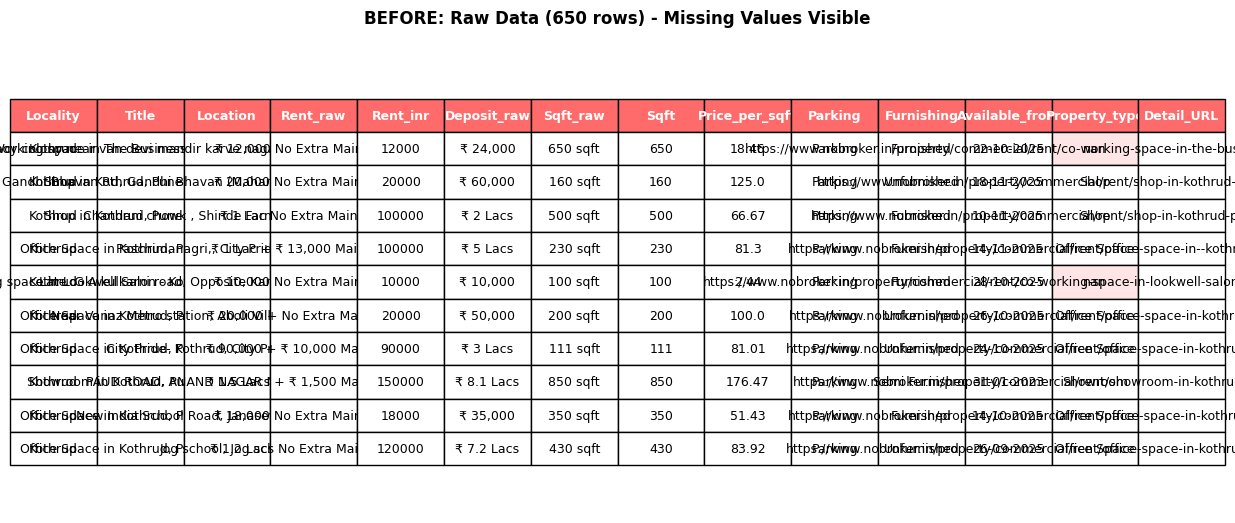

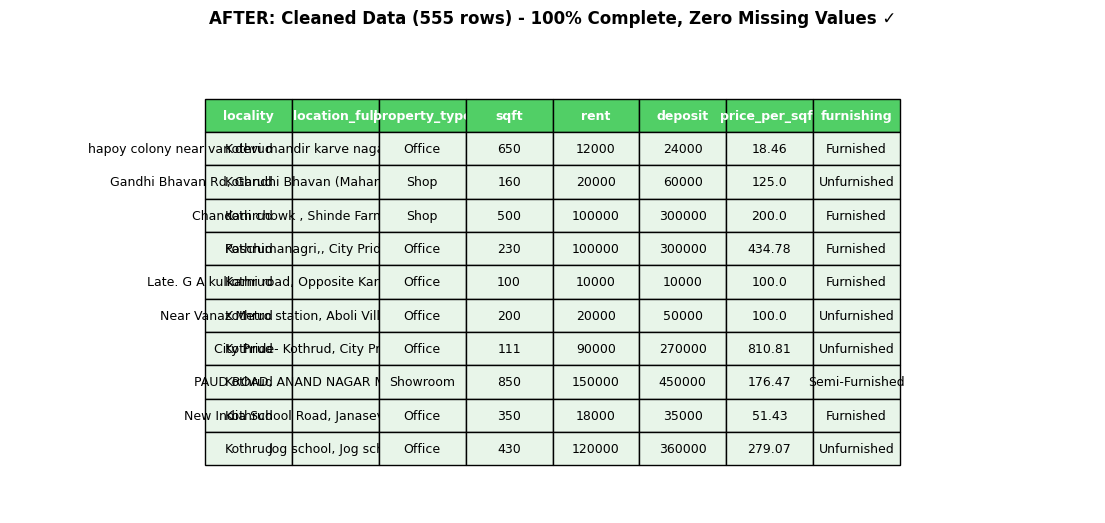

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#  Create Before Cleaning Screenshot
df_raw = pd.read_csv('pune_commercial_listings_nobroker.csv')  # 650 rows
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Show first 10 rows with missing values highlighted
display_df = df_raw.head(10).copy()
table = ax.table(cellText=display_df.values, colLabels=display_df.columns,
                cellLoc='center', loc='center', colWidths=[0.08]*len(display_df.columns))
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Color header
for i in range(len(display_df.columns)):
    table[(0, i)].set_facecolor('#FF6B6B')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Highlight missing values
for i in range(1, len(display_df) + 1):
    for j in range(len(display_df.columns)):
        if pd.isna(display_df.iloc[i-1, j]):
            table[(i, j)].set_facecolor('#FFE5E5')

plt.title('BEFORE: Raw Data (650 rows) - Missing Values Visible', 
         fontsize=12, fontweight='bold', pad=20)
plt.savefig('before_cleaning.png', dpi=300, bbox_inches='tight')
plt.show()

# Create After Cleaning Screenshot
df_cleaned = pd.read_csv('pune_commercial_listings_cleaned.csv')  # 555 rows
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

display_df_clean = df_cleaned.head(10).copy()
table = ax.table(cellText=display_df_clean.values, colLabels=display_df_clean.columns,
                cellLoc='center', loc='center', colWidths=[0.08]*len(display_df_clean.columns))
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Color header
for i in range(len(display_df_clean.columns)):
    table[(0, i)].set_facecolor('#51CF66')
    table[(0, i)].set_text_props(weight='bold', color='white')

# All cells clean
for i in range(1, len(display_df_clean) + 1):
    for j in range(len(display_df_clean.columns)):
        table[(i, j)].set_facecolor('#E8F5E9')

plt.title('AFTER: Cleaned Data (555 rows) - 100% Complete, Zero Missing Values ✓', 
         fontsize=12, fontweight='bold', pad=20)
plt.savefig('after_cleaning.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
df_raw = pd.read_csv("pune_commercial_listings_nobroker.csv")
df_raw.head()

,Locality,Title,Location,Rent_raw,Rent_inr,Deposit_raw,Sqft_raw,Sqft,Price_per_sqft,Parking,Furnishing,Available_from,Property_type,Detail_URL
0,Kothrud,"Co-Working space in The Business Hub, Pune for...",hapoy colony near van devi mandir karve nagar ...,"₹ 12,000 No Extra Maintenance",12000,"₹ 24,000",650 sqft,650,18.46,Parking,Furnished,22-10-2025,NaN,https://www.nobroker.in/property/commercial/re...
1,Kothrud,"Shop in Kothrud, Pune for Rent","Gandhi Bhavan Rd, Gandhi Bhavan (Maharashtra G...","₹ 20,000 No Extra Maintenance",20000,"₹ 60,000",160 sqft,160,125.00,Parking,Unfurnished,18-11-2025,Shop,https://www.nobroker.in/property/commercial/re...
2,Kothrud,"Shop in Kothrud, Pune for Rent","Chandani chowk , Shinde Farm Golden Group,",₹ 1 Lac No Extra Maintenance,100000,₹ 2 Lacs,500 sqft,500,66.67,Parking,Furnished,10-11-2025,Shop,https://www.nobroker.in/property/commercial/re...
3,Kothrud,"Office Space in Kothrud, Pune for Rent","Paschimanagri,, City Pride- Kothrud","₹ 1 Lac + ₹ 13,000 Maintenance",100000,₹ 5 Lacs,230 sqft,230,81.30,Parking,Furnished,14-11-2025,Office Space,https://www.nobroker.in/property/commercial/re...
4,Kothrud,"Co-Working space in Lookwell Salon - Kothrud, ...","Late. G A kulkarni road, Opposite Karishma Soc...","₹ 10,000 No Extra Maintenance",10000,"₹ 10,000",100 sqft,100,2.44,Parking,Furnished,28-10-2025,NaN,https://www.nobroker.in/property/commercial/re...


In [3]:
df_raw = pd.read_csv("pune_commercial_listings_cleaned.csv")
df_raw.head()

,locality,location_full,property_type,sqft,rent,deposit,price_per_sqft,furnishing
0,Kothrud,hapoy colony near van devi mandir karve nagar ...,Office,650,12000,24000,18.46,Furnished
1,Kothrud,"Gandhi Bhavan Rd, Gandhi Bhavan (Maharashtra G...",Shop,160,20000,60000,125.00,Unfurnished
2,Kothrud,"Chandani chowk , Shinde Farm Golden Group,",Shop,500,100000,300000,200.00,Furnished
3,Kothrud,"Paschimanagri,, City Pride- Kothrud",Office,230,100000,300000,434.78,Furnished
4,Kothrud,"Late. G A kulkarni road, Opposite Karishma Soc...",Office,100,10000,10000,100.00,Furnished
